# Exploratory Data Analysis
## Learning Goals
- Load data from an external source into a pandas DataFrame
- Use pandas methods to inspect and understand the structure and quality of a dataset
- Generate visualizations to explore patterns, distributions, and relationships in the data


In [1]:
!pip install pandas numpy seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading in Data

In [26]:
df = pd.read_csv("ODF_Fire_Data.csv")

In [27]:
from urllib import request
data_url = "https://data.oregon.gov/api/views/fbwv-q84y/rows.csv?accessType=DOWNLOAD"
request.urlretrieve(data_url, filename='mortality_data.csv')

('mortality_data.csv', <http.client.HTTPMessage at 0x77bc9ce0b070>)

In [28]:
fire_json = """
{
  "fires": [
    {
      "FireYear": 2015,
      "FireName": "Bass 497",
      "EstTotalAcres": 3.2,
      "HumanOrLightning": "Human",
      "County": "Klamath"
    },
    {
      "FireYear": 2022,
      "FireName": "Hay Fire",
      "EstTotalAcres": 0.2,
      "HumanOrLightning": "Human",
      "County": "Klamath"
    },
    {
      "FireYear": 2000,
      "FireName": "Slick Ear #2",
      "EstTotalAcres": 0.75,
      "HumanOrLightning": "Lightning",
      "County": "Grant"
    }
  ]
}
"""


from pprint import pprint as pp
import json
data = json.loads(fire_json)
pp(data)

fire = pd.DataFrame(data["fires"], columns=["FireName", "FireYear", "EstTotalAcres", "HumanOrLightning", "County"])
fire

{'fires': [{'County': 'Klamath',
            'EstTotalAcres': 3.2,
            'FireName': 'Bass 497',
            'FireYear': 2015,
            'HumanOrLightning': 'Human'},
           {'County': 'Klamath',
            'EstTotalAcres': 0.2,
            'FireName': 'Hay Fire',
            'FireYear': 2022,
            'HumanOrLightning': 'Human'},
           {'County': 'Grant',
            'EstTotalAcres': 0.75,
            'FireName': 'Slick Ear #2',
            'FireYear': 2000,
            'HumanOrLightning': 'Lightning'}]}


,FireName,FireYear,EstTotalAcres,HumanOrLightning,County
0,Bass 497,2015,3.20,Human,Klamath
1,Hay Fire,2022,0.20,Human,Klamath
2,Slick Ear #2,2000,0.75,Lightning,Grant


## Your Turn: Lodaing Data
- Go to https://data.gov/ and pick a csv data set, then load it in and save it to a vairable for use later. 

# Exploratory Data Analysis (EDA)

- Explore and summarize data to:
  - Gain insights  
  - Discover relationships between variables  
  - Identify outliers and missing values  
  - Recognize patterns and trends  
  - Inform the selection of appropriate modeling techniques  


In [29]:
# Head returns the first five rows of a DataFrame
df.head()

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,102649,STAT,2015,EOA,Klamath-Lake,Klamath,15-981082-16,Bass 497,B,3.20,...,Does Not Apply - Eastern OR,09/02/2015 05:00:00 PM,09/02/2015 05:05:00 PM,09/02/2015 05:00:00 PM,09/02/2015 11:00:00 PM,09/05/2015 12:00:00 AM,10/13/2015 08:39:00 AM,98,981,082
1,131239,STAT,2022,EOA,Walker Range - WRFPA,Crescent,22-991220-23,Hay Fire,A,NaN,...,NaN,NaN,08/16/2022 06:56:00 PM,NaN,NaN,08/18/2022 12:00:00 AM,08/18/2022 09:11:00 AM,99,991,220
2,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
3,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
4,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133


In [30]:
#Returns the last 5 rows
df.tail()

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
23485,124548,STAT,2021,EOA,Walker Range - WRFPA,Crescent,21-991258-21,Road 2430,B,0.75,...,Does Not Apply - Eastern OR,06/26/2021 04:00:00 PM,06/26/2021 04:58:00 PM,06/26/2021 04:45:00 PM,06/26/2021 09:58:00 PM,07/01/2021 12:00:00 AM,10/02/2021 03:08:00 PM,99,991,258
23486,132141,STAT,2022,SOA,Western Lane,Veneta,22-781066-23,Spruce Path,A,0.01,...,Lvl 1 Fire Season Only,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 12:14:00 PM,09/13/2022 12:00:00 AM,09/19/2022 10:09:00 AM,78,781,066
23487,124065,STAT,2021,EOA,Northeast Oregon,Pendleton,21-973052-21,Bone Canyon,C,67.43,...,Does Not Apply - Eastern OR,06/13/2021 05:22:00 PM,06/14/2021 12:45:00 PM,06/14/2021 12:45:00 PM,06/17/2021 05:10:00 PM,06/14/2021 12:00:00 AM,09/24/2021 01:48:00 PM,97,973,052
23488,131292,STAT,2022,EOA,Northeast Oregon,Pendleton,22-973014-23,Milepost 231,A,0.10,...,Does Not Apply - Eastern OR,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 04:41:00 PM,08/19/2022 12:00:00 AM,11/08/2022 11:34:00 AM,97,973,014
23489,131287,STAT,2022,EOA,Central Oregon,Sisters,22-955070-23,That Way 774,A,0.01,...,Does Not Apply - Eastern OR,08/19/2022 05:00:00 PM,08/19/2022 05:00:00 PM,08/19/2022 05:00:00 PM,08/19/2022 06:07:00 PM,08/19/2022 12:00:00 AM,08/30/2022 02:04:00 PM,95,955,070


In [31]:
#Returns a specific number of rows
df.sample(10)

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
11815,90021,STAT,2011,SOA,South Cascade,Sweet Home,11-772052-12,BERLIN,A,0.10,...,Lvl 2 Limited Shutdown,09/25/2011 01:50:00 PM,09/25/2011 02:00:00 PM,09/25/2011 01:50:00 PM,09/25/2011 02:30:00 PM,09/25/2011 12:00:00 AM,09/26/2011 10:08:00 AM,77,772,052
3311,64221,STAT,2002,SOA,Southwest Oregon,Grants Pass,02-712068-03,1424 N RIVER ROAD,A,0.01,...,Lvl 3 Restricted Shutdown,07/23/2002 08:30:00 AM,07/23/2002 08:44:00 AM,07/23/2002 08:44:00 AM,07/23/2002 09:45:00 AM,07/23/2002 10:13:00 AM,08/02/2002 08:12:00 AM,71,712,068
2297,74406,STAT,2006,NOA,West Oregon,Dallas,06-552029-06,East Creek,A,0.20,...,Outside Closed Fire Season,06/18/2006 06:00:00 PM,06/18/2006 08:05:00 PM,06/18/2006 08:00:00 PM,06/28/2006 10:30:00 PM,06/25/2006 02:01:00 PM,01/11/2008 03:36:00 PM,55,552,029
3579,59099,STAT,2000,EOA,Klamath-Lake,Klamath,00-981074-01,WOOF,A,0.01,...,Does Not Apply - Eastern OR,08/18/2000 12:00:00 PM,08/19/2000 03:38:00 PM,08/19/2000 03:36:00 PM,08/19/2000 04:30:00 PM,08/19/2000 06:26:00 PM,09/28/2000 02:51:00 PM,98,981,074
11413,102499,STAT,2015,NOA,North Cascade,Santiam,15-582035-16,Fern Ridge Field,A,0.25,...,Lvl 3 Restricted Shutdown,08/27/2015 05:50:00 PM,08/27/2015 05:59:00 PM,08/27/2015 05:56:00 PM,08/27/2015 06:20:00 PM,08/27/2015 12:00:00 AM,09/17/2015 09:37:00 AM,58,582,035
13397,125294,STAT,2021,SOA,Western Lane,Veneta,21-781020-22,Stagecoach MP 7.5,A,0.01,...,Lvl 2 Limited Shutdown,07/23/2021 11:30:00 AM,07/23/2021 11:50:00 AM,07/23/2021 11:30:00 AM,07/23/2021 06:45:00 PM,07/23/2021 12:00:00 AM,07/25/2021 06:36:00 PM,78,781,020
8136,61814,STAT,2001,EOA,Klamath-Lake,Lakeview,01-982084-02,Douglas #340,A,0.10,...,Does Not Apply - Eastern OR,08/09/2001 06:00:00 AM,08/09/2001 09:26:00 AM,08/09/2001 09:00:00 AM,08/09/2001 11:10:00 AM,08/14/2001 10:55:00 AM,11/14/2001 04:00:00 PM,98,982,084
11727,98278,STAT,2014,SOA,South Cascade,Eastern Lane,14-771057-15,Thomas Creek,B,4.85,...,Lvl 2 Limited Shutdown,08/10/2014 06:00:00 PM,08/10/2014 10:30:00 PM,08/10/2014 10:30:00 PM,08/11/2014 04:51:00 PM,08/16/2014 12:00:00 AM,08/17/2014 01:03:00 PM,77,771,057
19292,91306,STAT,2012,EOA,Walker Range - WRFPA,Crescent,12-991214-13,COIDC 415,A,0.10,...,Does Not Apply - Eastern OR,08/05/2012 12:00:00 AM,08/07/2012 04:09:00 PM,08/07/2012 04:00:00 PM,08/07/2012 05:48:00 PM,08/10/2012 12:00:00 AM,08/11/2012 09:54:00 AM,99,991,214
11125,83877,STAT,2009,NOA,Forest Grove,Forest Grove,09-531001-10,2500 ROAD REKINDLE,C,11.00,...,Outside Closed Fire Season,07/01/2009 03:30:00 AM,07/01/2009 04:47:00 AM,07/01/2009 04:30:00 AM,07/01/2009 03:30:00 PM,07/01/2009 12:00:00 AM,03/29/2010 02:03:00 PM,53,531,001


In [32]:
# Returns a tuple with the total number of rows and columns
print(df.shape)
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

(23490, 38)
Rows:  23490
Columns:  38


## Types of Data

- **Categorical**: Data that falls into one of a limited number of distinct groups.
  - **Nominal**: Categories with no inherent order (e.g., vehicle types).
  - **Ordinal**: Categories with a meaningful order but no numeric difference between them (e.g., agree, strongly agree).

- **Numeric / Continuous**: Data represented by numbers (integers or floats) where mathematical operations make sense.
  - **Interval**: Ordered numeric data where differences between values are meaningful, but there is no true zero (e.g., temperature in Celsius).
  - **Ratio**: Numeric data with a true zero, where both differences and ratios are meaningful (e.g., height, weight).

- **Dates**: Can be treated as either categorical or numeric depending on context.
  - **Categorical**: When broken into components such as day of the week, month, or year.
  - **Numeric**: When measured as time elapsed from a fixed reference point (e.g., days since 2025-01-01).


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Serial                  23490 non-null  int64  
 1   FireCategory            23490 non-null  object 
 2   FireYear                23490 non-null  int64  
 3   Area                    23490 non-null  object 
 4   DistrictName            23490 non-null  object 
 5   UnitName                23490 non-null  object 
 6   FullFireNumber          23490 non-null  object 
 7   FireName                23490 non-null  object 
 8   Size_class              23490 non-null  object 
 9   EstTotalAcres           23411 non-null  float64
 10  Protected_Acres         23490 non-null  float64
 11  HumanOrLightning        23490 non-null  object 
 12  CauseBy                 23362 non-null  object 
 13  GeneralCause            23490 non-null  object 
 14  SpecificCause           23266 non-null

In [34]:
df.dtypes

Serial                      int64
FireCategory               object
FireYear                    int64
Area                       object
DistrictName               object
UnitName                   object
FullFireNumber             object
FireName                   object
Size_class                 object
EstTotalAcres             float64
Protected_Acres           float64
HumanOrLightning           object
CauseBy                    object
GeneralCause               object
SpecificCause              object
Cause_Comments             object
Lat_DD                    float64
Long_DD                   float64
LatLongDD                  object
FO_LandOwnType             object
Twn                        object
Rng                        object
Sec                       float64
Subdiv                     object
LandmarkLocation           object
County                     object
RegUseZone                 object
RegUseRestriction          object
Industrial_Restriction     object
Ign_DateTime  

In [35]:
#Getting Features by Type
numeric_fetaures = df.select_dtypes(include=[np.number])
numeric_fetaures = numeric_fetaures.columns.tolist()
categorical_fetaures = df.select_dtypes(exclude=[np.number])
categorical_fetaures = categorical_fetaures.columns.tolist()
print(numeric_fetaures)
print(categorical_fetaures)

['Serial', 'FireYear', 'EstTotalAcres', 'Protected_Acres', 'Lat_DD', 'Long_DD', 'Sec', 'DistrictCode', 'UnitCode']
['FireCategory', 'Area', 'DistrictName', 'UnitName', 'FullFireNumber', 'FireName', 'Size_class', 'HumanOrLightning', 'CauseBy', 'GeneralCause', 'SpecificCause', 'Cause_Comments', 'LatLongDD', 'FO_LandOwnType', 'Twn', 'Rng', 'Subdiv', 'LandmarkLocation', 'County', 'RegUseZone', 'RegUseRestriction', 'Industrial_Restriction', 'Ign_DateTime', 'ReportDateTime', 'Discover_DateTime', 'Control_DateTime', 'CreationDate', 'ModifiedDate', 'DistFireNumber']


In [36]:
# Categorical Exploration 

print("Value Counts:")
print(df["CauseBy"].value_counts())
print("")

print("Number of Unique Values:")
print(df["CauseBy"].nunique())
print("")


print("Unique Values:")
print(df["CauseBy"].unique())
print("")



Value Counts:
CauseBy
Lightning                   6250
Ruralist-Paying             3995
Recreationist               2921
Other-Public                2373
Motorist                    2008
Other-Landowner Related     1391
Public Utility              1285
Rancher-Farmer               908
Timber Harvest Worker        742
Other Forest Mgt. Worker     373
Ruralist-Non-Paying          370
Hunter                       320
Transient                    304
Hiker                         62
Fisherman                     34
Marijuana Grower              26
Name: count, dtype: int64

Number of Unique Values:
16

Unique Values:
['Other-Public' nan 'Lightning' 'Motorist' 'Public Utility'
 'Recreationist' 'Ruralist-Paying' 'Hunter' 'Other-Landowner Related'
 'Transient' 'Other Forest Mgt. Worker' 'Rancher-Farmer'
 'Timber Harvest Worker' 'Ruralist-Non-Paying' 'Hiker' 'Fisherman'
 'Marijuana Grower']



In [37]:
# Numeric Exploration
print("Max total Acres Destoryed: ", df["EstTotalAcres"].max())
print("Min total Acres Destoryed: ", df["EstTotalAcres"].min())
print("Mean total Acres Destoryed: ", df["EstTotalAcres"].mean())
print("Median total Acres Destoryed: ", df["EstTotalAcres"].median())
print("Standard Deviation: ",  df["EstTotalAcres"].std()) 
numeric_rows = df[numeric_fetaures]
print("Mean value for each row:", numeric_rows.quantile())

Max total Acres Destoryed:  499945.0
Min total Acres Destoryed:  0.0
Mean total Acres Destoryed:  270.8025030968348
Median total Acres Destoryed:  0.1
Standard Deviation:  6816.73696581965
Mean value for each row: Serial             88340.000000
FireYear            2011.000000
EstTotalAcres          0.100000
Protected_Acres        0.100000
Lat_DD                43.581805
Long_DD             -122.847220
Sec                   19.000000
DistrictCode          73.000000
UnitCode             732.000000
Name: 0.5, dtype: float64


In [38]:
# Describes the Categorical Data
df.describe(include=["object"])

,FireCategory,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,HumanOrLightning,CauseBy,GeneralCause,...,RegUseZone,RegUseRestriction,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistFireNumber
count,23490,23490,23490,23490,23490,23490,23490,23490,23362,23490,...,23440,23401,23401,23396,23490,23396,23395,23487,23490,23490
unique,1,3,14,31,23335,19637,7,3,16,10,...,144,6,7,20257,22822,22504,22304,11005,22865,1009
top,STAT,SOA,Southwest Oregon,Grants Pass,02-952017-03,Mill Creek,A,Human,Lightning,Lightning,...,SW3,Reg Use Closure,Does Not Apply - Eastern OR,07/15/2018 09:00:00 AM,08/17/2022 05:00:00 PM,08/17/2022 05:00:00 PM,12/31/2013 12:00:00 PM,08/19/2008 12:00:00 AM,10/26/2001 10:20:00 AM,018
freq,23490,12125,5975,3072,2,33,17013,17197,6250,6266,...,3011,14671,6562,92,18,19,20,67,12,257


In [39]:
# Describes the numeric data
# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile.
# 50% - The 50% percentile (median value).
# 75% - The 75% percentile.
# max - the maximum value.
print(df.describe())

              Serial     FireYear  EstTotalAcres  Protected_Acres  \
count   23490.000000  23490.00000   23411.000000     23490.000000   
mean    90425.933461   2010.80132     270.802503        63.454008   
std     20901.016028      6.73508    6816.736966      1973.577812   
min     57485.000000   2000.00000       0.000000         0.000000   
25%     72508.500000   2005.00000       0.010000         0.010000   
50%     88340.000000   2011.00000       0.100000         0.100000   
75%    107432.500000   2017.00000       0.500000         0.350000   
max    134021.000000   2022.00000  499945.000000    154570.000000   

             Lat_DD       Long_DD           Sec  DistrictCode      UnitCode  
count  23480.000000  23480.000000  23478.000000  23490.000000  23490.000000  
mean      43.718410   -122.258736     18.576753     77.754662    779.371052  
std        1.226385      1.707589     10.439507     14.618857    146.534574  
min       41.089460   -124.983610      1.000000     51.000000    5

In [40]:
# Missing Values 
# We
df.isna().count()
df = df.dropna()

## Your Turn: Exploring the Shape of Your Data

Use the methods discussed above to create a short exploratory report of your dataset.

Your report should include:

1. **Basic Structure**
   - The number of rows and columns  
   - A preview of the first few rows  
   - A list of all column names  

2. **Data Types**
   - Identify which columns are numeric  
   - Identify which columns are categorical  

3. **Summary Statistics**
   - Summarize the numeric columns  
   - Summarize the categorical columns  

4. **Missing Values**
   - Determine whether any columns contain missing data  
   - Identify which columns have the most missing values  

5. **Reflection**
   Note: You will share this with the class later
   Write 3–5 sentences describing:
   - What you learned about the dataset  
   - Any patterns or irregularities you noticed  


## Matplotlib Crash Course

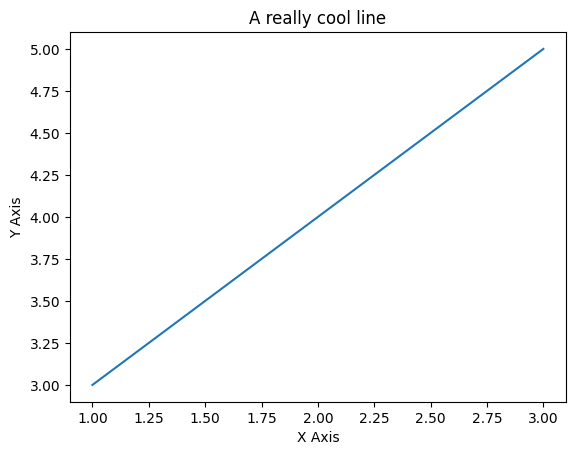

In [70]:
x = [1,2,3]
y = [3,4,5]
plt.plot(x,y)
plt.title('A really cool line')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

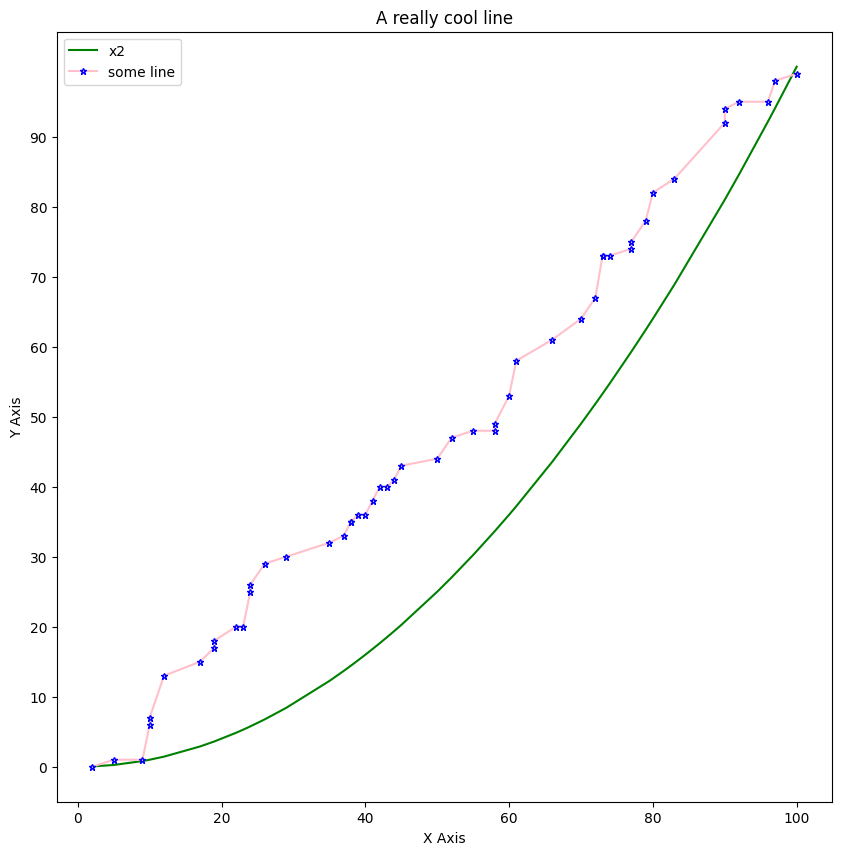

In [80]:
#docs https://matplotlib.org/
# Size your graph
plt.figure(figsize=(10,10))

x = np.sort(np.random.randint(0, 101, 50))
y = np.sort(np.random.randint(0, 101, 50))
x2 = np.arange(0, 101, 20)
plt.plot(x, x**2 / 100, 'green', label="x2")



plt.plot(x,y, label="some line", color="pink", marker="*", markersize=5, markeredgecolor='blue',)
plt.title('A really cool line')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
#Reminder arange creates an array of evenly spaced values, start, end, step
plt.yticks(np.arange(0,100,10))
plt.legend()
plt.show()

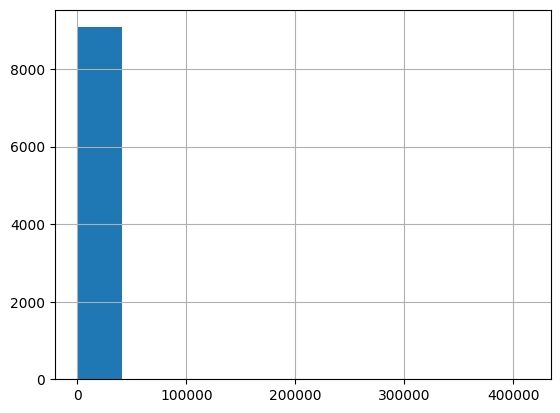

In [94]:
# Pandas uses matplotlib 
df["EstTotalAcres"].hist()
plt.show()

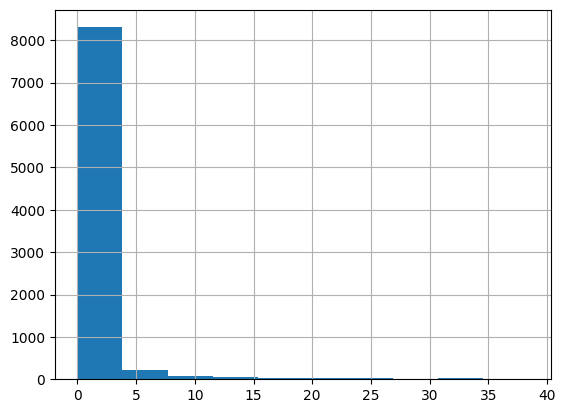

In [89]:
#Histagrams for numeric data
df[df["EstTotalAcres"] < 40]["EstTotalAcres"].hist()
plt.show()

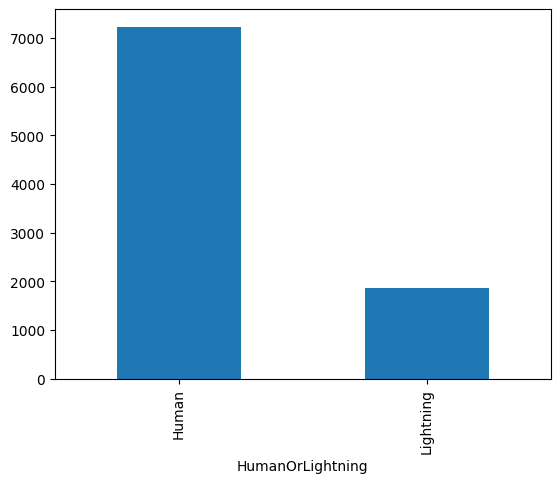

In [90]:
#Bar charts for categorical data
df["HumanOrLightning"].value_counts().plot(kind="bar")
plt.show()

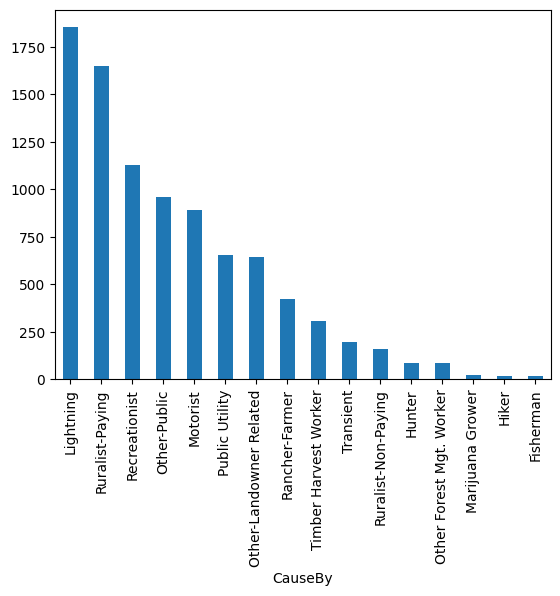

In [91]:
df["CauseBy"].value_counts().plot(kind="bar")
plt.show()

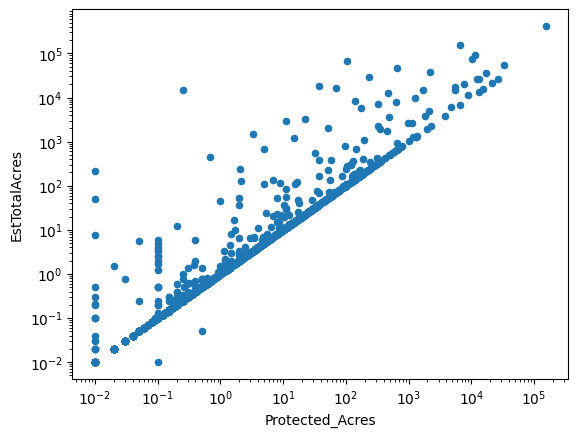

In [92]:
df.plot(
    x="Protected_Acres",
    y="EstTotalAcres",
    kind="scatter"
)
#updates the scale to be logrithmic multiples of 10, log10 is being applied. 
#100 - 2, 1,000 - 3, 10,000 - 4 and so on
plt.xscale("log")
plt.yscale("log")


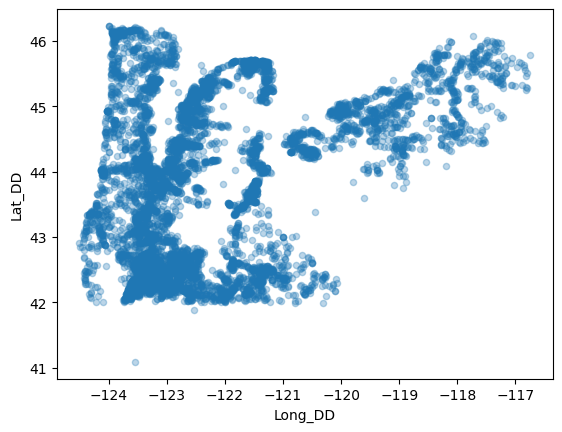

In [96]:
df.plot(
    x="Long_DD",
    y="Lat_DD",
    kind="scatter",
    alpha=0.3
)
plt.show()

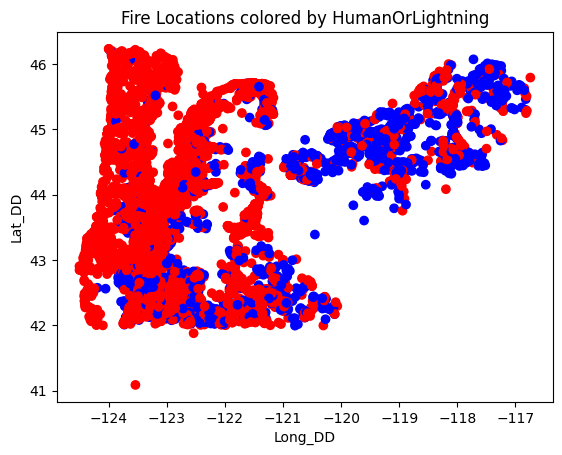

In [95]:
colors = df["HumanOrLightning"].map({
    "Human": "red",
    "Lightning": "blue"
}).fillna("gray") 

plt.scatter(df["Long_DD"], df["Lat_DD"], c=colors)
plt.xlabel("Long_DD")
plt.ylabel("Lat_DD")
plt.title("Fire Locations colored by HumanOrLightning")
plt.show()


## Your Turn: Visualizing Your Data

Create visualizations to explore patterns and relationships in your dataset.

### 1. Histograms (Numeric Data)
- Identify all numeric columns.
- Create a histogram for each numeric feature.

### 2. Bar Charts (Categorical Data)
- Identify all categorical columns.
- Create a bar chart showing the frequency of each category.

### 3. Scatter Plots
- Select at least two numeric features.
- Create simple scatter plots to explore relationships.

### 4. Reflection:  Note: You will share this with the class later
Write 3–5 sentences answering:
- What patterns did you notice?
- Which variables appear related?
- Were any variables heavily skewed?
- Did you observe outliers?


Lets share our observations! 